<a href="https://colab.research.google.com/github/IvanOM-97/DPro-Exercises/blob/master/U41T1C82DeepNeuralNetworkSeriesAssignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
REDES NEURONALES PROFUNDAS

'''

Model 1: tanh activation with simple initialization and SGD
epoch: 1/10, train_loss: 0.6876 val_loss: 0.6826
epoch: 2/10, train_loss: 0.4053 val_loss: 0.4052
epoch: 3/10, train_loss: 0.3439 val_loss: 0.3458
epoch: 4/10, train_loss: 0.3128 val_loss: 0.3170
epoch: 5/10, train_loss: 0.2882 val_loss: 0.2946
epoch: 6/10, train_loss: 0.2676 val_loss: 0.2758
epoch: 7/10, train_loss: 0.2492 val_loss: 0.2591
epoch: 8/10, train_loss: 0.2323 val_loss: 0.2439
epoch: 9/10, train_loss: 0.2165 val_loss: 0.2296
epoch: 10/10, train_loss: 0.2017 val_loss: 0.2162
Validation Accuracy: 0.9398


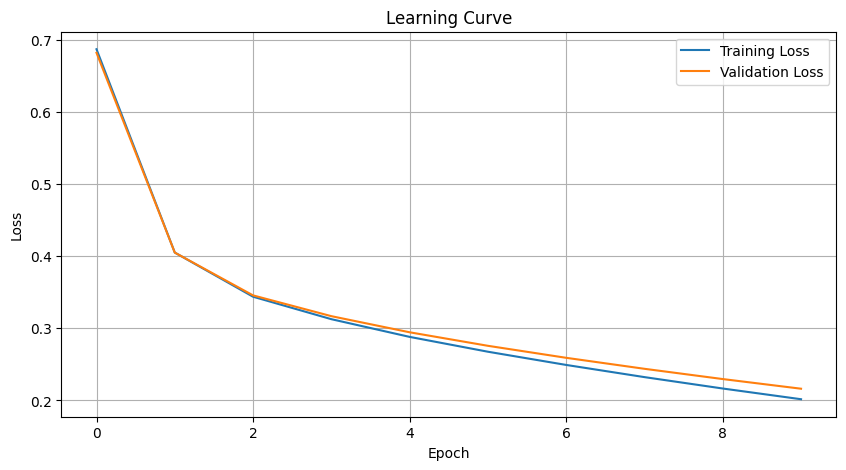

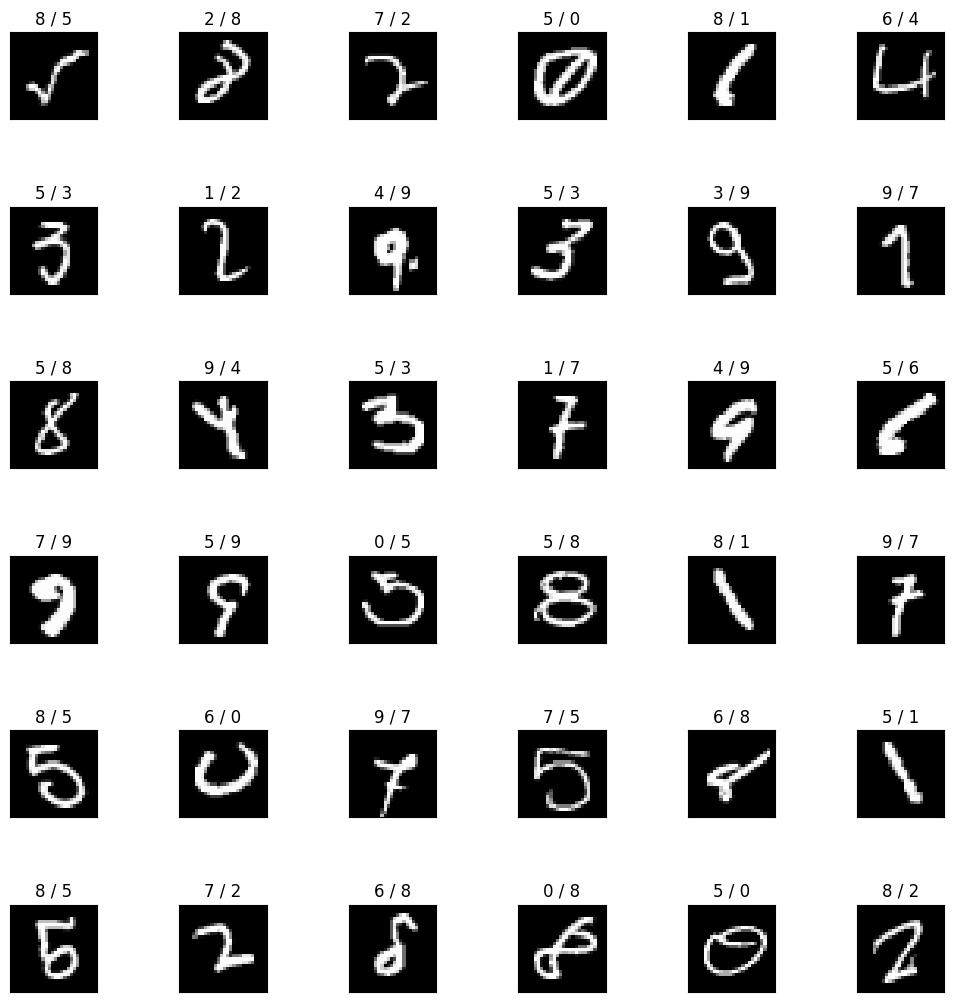


Model 2: relu activation with he intialization and adagrad
epoch: 1/10, train_loss: 0.0887 val_loss: 0.1126
epoch: 2/10, train_loss: 0.0581 val_loss: 0.0916
epoch: 3/10, train_loss: 0.0420 val_loss: 0.0823
epoch: 4/10, train_loss: 0.0320 val_loss: 0.0775
epoch: 5/10, train_loss: 0.0252 val_loss: 0.0744
epoch: 6/10, train_loss: 0.0200 val_loss: 0.0728
epoch: 7/10, train_loss: 0.0162 val_loss: 0.0719
epoch: 8/10, train_loss: 0.0135 val_loss: 0.0716
epoch: 9/10, train_loss: 0.0113 val_loss: 0.0716
epoch: 10/10, train_loss: 0.0096 val_loss: 0.0717
Validation Accuracy: 0.9792


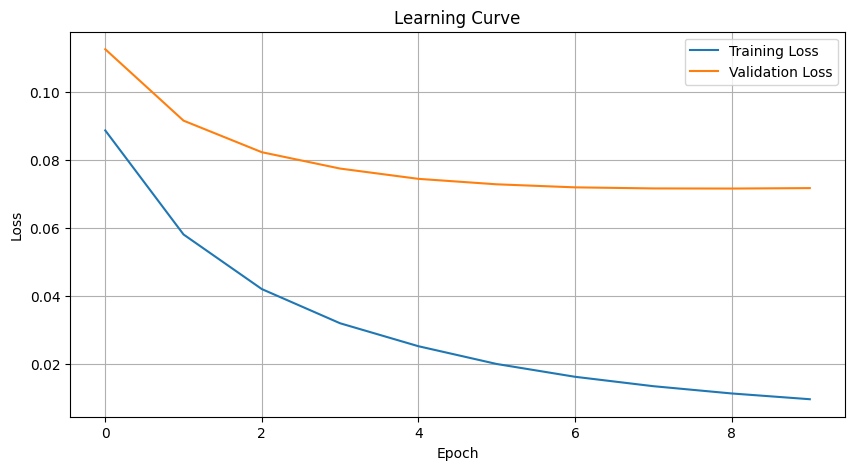

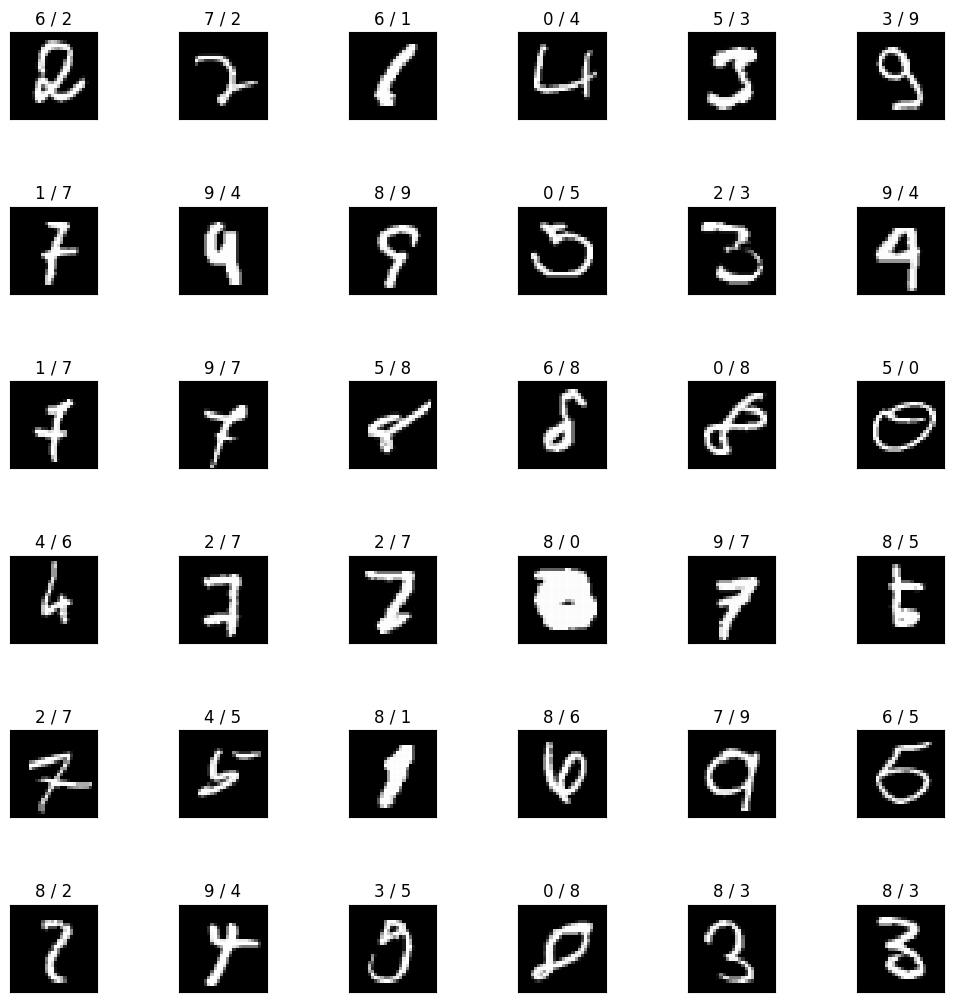


Model 3: deeper network with relu and he initialization
epoch: 1/10, train_loss: 0.0750 val_loss: 0.0985
epoch: 2/10, train_loss: 0.0440 val_loss: 0.0806
epoch: 3/10, train_loss: 0.0289 val_loss: 0.0746
epoch: 4/10, train_loss: 0.0202 val_loss: 0.0730
epoch: 5/10, train_loss: 0.0142 val_loss: 0.0731
epoch: 6/10, train_loss: 0.0101 val_loss: 0.0739
epoch: 7/10, train_loss: 0.0079 val_loss: 0.0756
epoch: 8/10, train_loss: 0.0062 val_loss: 0.0777
epoch: 9/10, train_loss: 0.0045 val_loss: 0.0788
epoch: 10/10, train_loss: 0.0033 val_loss: 0.0796
Validation Accuracy: 0.9811


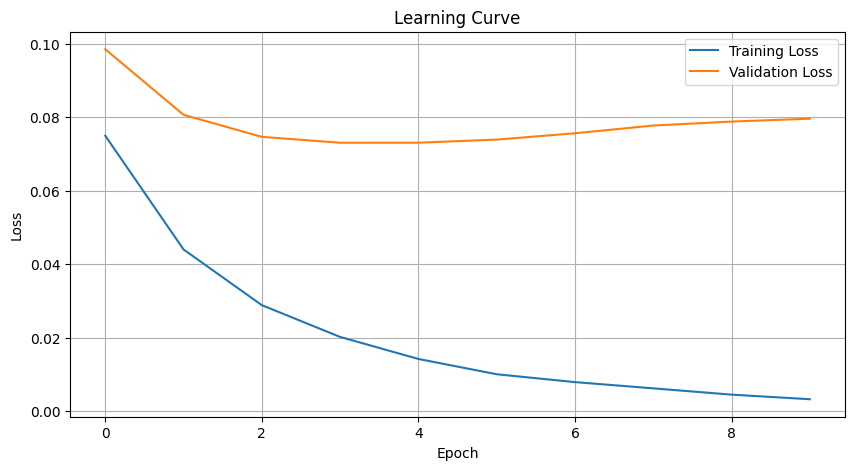

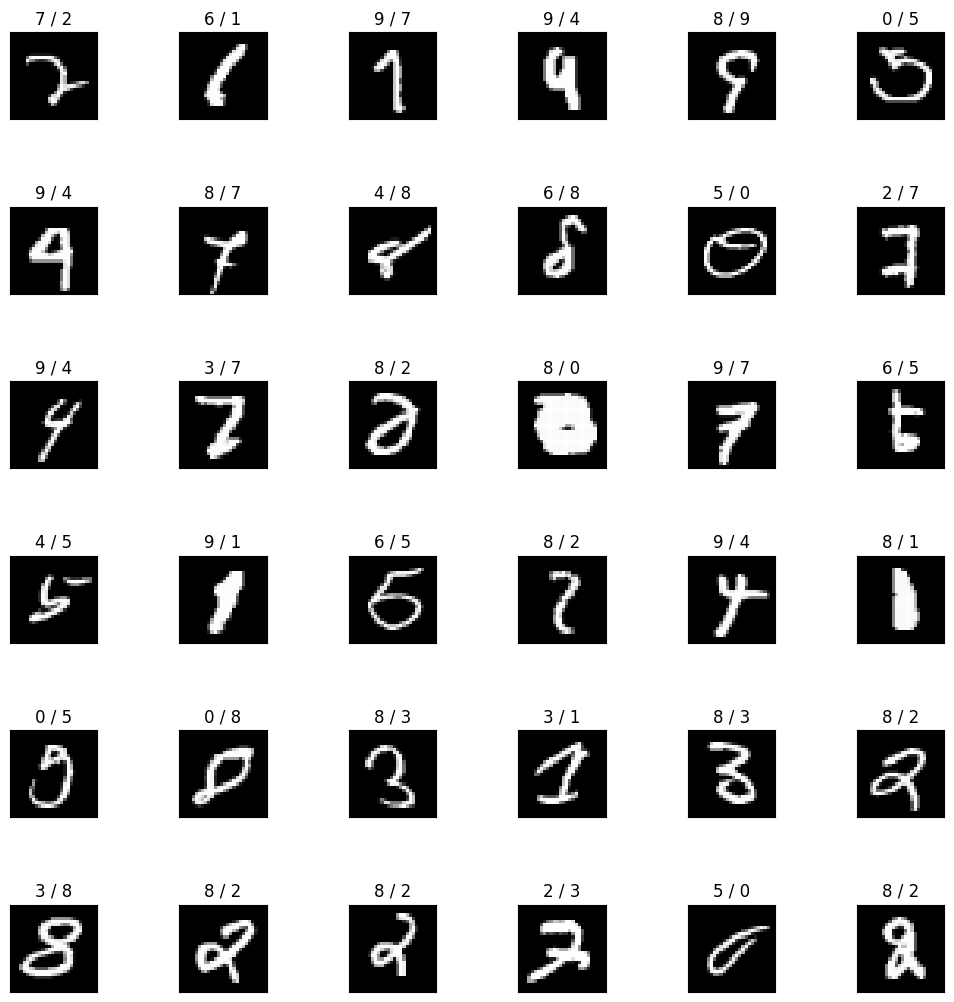

In [2]:
# PLANTILLA DE FULLY CONNECTED LAYERS
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.datasets import mnist

# PROBLEMA 1 - CLASIFICACION DE CAPAS COMPLETAMENTE CONECTADAS
class FC:
    """
    Fully connected layer from n_nodes1 to n_nodes2

      Parameters

      n_nodes1 : int
      Number of nodes in the previous layer

      n_nodes2 : int
      Number of nodes in the next layer

      initializer : instance of an initialization method
      Initialization method

      optimizer : instance of an optimization method
      Optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.optimizer = optimizer
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する

    def forward(self, X):
        """
        forward
          parameters:
          ------------------------------
          X: the following forms of ndarray, shape(batch_size, n_nodes1)
          Returns:
          ------------------------------
          A: the following forms of ndarray, shape(batch_size, n_nodes2
        """
        self.X = X
        return np.dot(X, self.W)+ self.B

    def backward(self, dA):
        """
        Backward

          Parameters

          dA : ndarray of shape (batch_size, n_nodes2)
          Gradient propagated from the next layer

          Returns

          dZ : ndarray of shape (batch_size, n_nodes1)
          Gradient to be propagated to the previous layer
        """
        batch_size = self.X.shape[0]
        self.dW = np.dot(self.X.T, dA)
        self.dB = np.sum(dA, axis=0)
        dZ = np.dot(dA, self.W.T)

        # updating weights and biases
        self = self.optimizer.update(self)
        return dZ

# PROBLEMA 2 - CLASIFICACION DEL METODO DE INCIALIZACION
# prototipo
class SimpleInitializer:
    """
    Simple initialization using Gaussian distribution

      Parameters

      sigma : float
      Standard deviation of the Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Weight Initialization

          Parameters

          n_nodes1 : int
          Number of nodes in the previous layer

          n_nodes2 : int
          Number of nodes in the next layer

          Returns

          W : initialized weights
        """
        return self.sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """
        Bias Initialization

          Parameters

          n_nodes2 : int
          Number of nodes in the next layer

          Returns

          B : initialized biases
        """
        return np.zeros(n_nodes2)

# PROBLEMA 3 - CLASIFICACION DE LOS METODOS DE OPTIMIZACION
# prototipo
class SGD:
    # stochastic gradient descent
    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return layer

# PROBLEMA 4 - CLASIFICACION DE LAS FUNCIONES DE ACTIVACION
class Tanh:
    # hyperbolic tabget activation function
    def forward(self, A):
        # forward propagation
        self.A = A
        return np.tanh(A)

    def backward(self, dZ):
        # backward propagation
        return dZ * (1 - np.tanh(self.A) ** 2)

class Sigmoid:
    # sigmoid activation function
    def forward(self, A):
        # forward propagation
        self.A = A
        return 1 / (1 + np.exp(-A))

    def backward(self, dZ):
        # backward propagation
        sig = 1 / (1 + np.exp(-self.A))
        return dZ * sig * (1 - sig)

class Softmax:
    # softmax activation function with cross-entropy loss
    def forward(self, A):
        # forward propagation
        exp_A = np.exp(A - np.max(A, axis=1, keepdims=True))
        self.Z = exp_A / np.sum(exp_A, axis=1, keepdims=True)
        return self.Z

    def backward(self, Z, Y):
        # backward propagation that will include cross-entropy gradient
        batch_size = Y.shape[0]
        return (Z - Y) / batch_size

# PROBLEMA 5 - CREANDO UNA CLASE ReLU
class ReLU:
    # Rectified Linear Unit activation function
    def forward(self, A):
        # forward propagation
        self.A = A
        return np.maximum(0, A)

    def backward(self, dZ):
        # backward propagation
        return dZ * (self.A > 0)

# PROBLEMA 6 - VALORES DE PESO INCIAL
class XavierInitializer:
    # xavier/glorot initialization for sigmoid/tanh
    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        # weight initialization
        sigma = np.sqrt(1 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        # bias initialization
        return np.zeros(n_nodes2)

class HeInitializer:
    # He initialization for ReLU
    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        # weight initialization
        sigma = np.sqrt(2 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        # bias initialization
        return np.zeros(n_nodes2)

# PROBLEMA 7 - METODOS DE OPTIMIZACION
class AdaGrad:
    # AdaGrad optimization metod
    def __init__(self, lr):
        self.lr = lr
        self.H ={} # dictionary to store H for each layer

    def update(self, layer):
        # updating weights and biases with adagrad

        # initializing H if not exist
        if id(layer) not in self.H:
            self.H[id(layer)] = {'HW': np.zeros_like(layer.W), 'HB': np.zeros_like(layer.B)}

        HW = self.H[id(layer)]['HW']
        HB = self.H[id(layer)]['HB']

        #updating HW and HB
        HW += layer.dW ** 2
        HB += layer.dB ** 2

        #updating weights and biases
        layer.W -= self.lr * (1 / (np.sqrt(HW) + 1e-7)) * layer.dW
        layer.B -= self.lr * (1 / (np.sqrt(HB) + 1e-7)) * layer.dB
        return layer

# PROBLEMA 8 - COMPLETANDO LA CLASE
class ScratchDeepNeuralNetrowkClassifier:
    # Deep neuronal network classifier
    def __init__(self, layers_config, initializer='simple', optimizer='sgd',
                 sigma=0.01, lr=0.01, epochs=10, batch_size=20, verbose=True):
        self.layers_config = layers_config
        self.sigma = sigma
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

        #initializing layers
        self._initialize_layers(initializer, optimizer)

        # for learning curve
        self.train_loss = []
        self.val_loss = []

    def _initialize_layers(self, initializer, optimizer):
        # Initialize layer based on configuration

        # selecting initializer
        if initializer == 'simple':
            initializer = SimpleInitializer(self.sigma)
        elif initializer == 'xavier':
            initializer = XavierInitializer()
        elif initializer == 'he':
            initializer = HeInitializer()

        # selecting optimizer
        if optimizer == 'sgd':
            optimizer = SGD(self.lr)
        elif optimizer == 'adagrad':
            optimizer = AdaGrad(self.lr)

        # creating layers
        self.layers = []
        self.activations = []

        for i, config in enumerate(self.layers_config):
            # adding FC layer
            n_nodes1 = config['input_dim'] if i == 0 else self.layers_config[i-1]['output_dim']
            n_nodes2 = config['output_dim']
            self.layers.append(FC(n_nodes1, n_nodes2, initializer, optimizer))

            # adding activation
            if config['activation'] == 'tanh':
                self.activations.append(Tanh())
            elif config['activation'] == 'sigmoid':
                self.activations.append(Sigmoid())
            elif config['activation'] == 'relu':
                self.activations.append(ReLU())
            elif config['activation'] == 'softmax':
                self.activations.append(Softmax())

    def fit(self, X, y, X_val=None, y_val=None):
        # Train the model
        for epoch in range(self.epochs):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)

            for mini_X, mini_y in get_mini_batch:
                # forward propagation
                A = mini_X
                for layer, activation in zip(self.layers, self.activations):
                    A = layer.forward(A)
                    Z = activation.forward(A)
                    A = Z

                # backward propagation
                dA = self.activations[-1].backward(Z, mini_y)
                for i in reversed(range(len(self.layers))):
                    dZ = self.layers[i].backward(dA)

                    if i > 0:
                        dA = self.activations[i-1].backward(dZ)

            # calculating loss
            train_loss = self._calc_loss(X, y)
            self.train_loss.append(train_loss)

            if X_val is not None and y_val is not None:
                val_loss = self._calc_loss(X_val, y_val)
                self.val_loss.append(val_loss)

            if self.verbose:
                print(f"epoch: {epoch+1}/{self.epochs}, train_loss: {train_loss:.4f}",
                f"val_loss: {val_loss:.4f}" if X_val is not None and y_val is not None else "")

    def _calc_loss(self, X, y):
        # Calculate cross-entropy loss

        # forward propagation
        A = X
        for layer, activation in zip(self.layers, self.activations):
            A = layer.forward(A)
            Z = activation.forward(A)
            A = Z

        # Calculating loss
        delta = 1e-7
        return -np.sum(y * np.log(Z + delta)) / y.shape[0]

    def predict(self, X):
        # Make predictions

        # forward propagation
        A = X
        for layer, activation in zip(self.layers, self.activations):
            A = layer.forward(A)
            Z = activation.forward(A)
            A = Z

        # returning class with highest probability
        return np.argmax(Z, axis=1)

    def predict_proba(self, X):
        # Return probability estimates

        # forward propagation
        A = X
        for layer, activation in zip(self.layers, self.activations):
            A = layer.forward(A)
            Z = activation.forward(A)
            A = Z
        return Z

# MINI BATCH PROCESSING
class GetMiniBatch:
    """
    Iterator to obtain mini-batches

      Parameters

      X : ndarray of shape (n_samples, n_features)
      Training data

      y : ndarray of shape (n_samples, 1)
      True labels

      batch_size : int
      Batch size

      seed : int
      Random seed for NumPy
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        #self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        self._stop = int(np.ceil(X.shape[0]/self.batch_size))

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

# PROBLEMA 9 - APRENDIZAJE Y ESTIMACION
def load_and_preprocess_data():
    # Loading and preprocessing MNIST data
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Preprocessing
    X_train = X_train.reshape(-1, 784).astype(np.float32) / 255
    X_test = X_test.reshape(-1, 784).astype(np.float32) / 255

    # One-hot encode labels
    try:
        enc = OneHotEncoder(sparse=False)     # for older versions
    except TypeError:
        enc = OneHotEncoder(sparse_output=False)  # for newer versions
    y_train_one_hot = enc.fit_transform(y_train.reshape(-1, 1))
    y_test_one_hot = enc.transform(y_test.reshape(-1, 1))

    # splitting into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

    return X_train, y_train, X_val, y_val, X_test, y_test

def evaluate_model(model, X_val, y_val):
    # Evaluating model performance.
    y_pred = model.predict(X_val)
    y_val_labels = np.argmax(y_val, axis=1)
    accuracy = np.mean(y_pred == y_val_labels)
    print(f"Validation Accuracy: {accuracy:.4f}")

    # Plotting learning curve
    plt.figure(figsize=(10, 5))
    plt.plot(model.train_loss, label='Training Loss')
    if model.val_loss:
        plt.plot(model.val_loss, label='Validation Loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid()
    plt.show()

def visualize_misclassifications(model, X_val, y_val, num=36):
    # Visualizing misclassifications
    y_pred = model.predict(X_val)
    y_val_labels = np.argmax(y_val, axis=1)

    true_false = y_pred == y_val_labels
    false_list = np.where(true_false==False)[0].astype(int)

    if false_list.shape[0] < num:
        num = false_list.shape[0]
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
    for i in range(num):
        ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
        ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val_labels[false_list[i]]))
        ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

    plt.show()

# Loading and preprocessing data
X_train, y_train, X_val, y_val, X_test, y_test = load_and_preprocess_data()

# Example configurations for P9
config1 = [{'input_dim': 784, 'output_dim': 400, 'activation': 'tanh'},
           {'input_dim': 400, 'output_dim': 200, 'activation': 'tanh'},
           {'input_dim': 200, 'output_dim': 10, 'activation': 'softmax'}]

config2 = [{'input_dim': 784, 'output_dim': 400, 'activation': 'relu'},
           {'input_dim': 400, 'output_dim': 200, 'activation': 'relu'},
           {'input_dim': 200, 'output_dim': 10, 'activation': 'softmax'}]

config3 = [{'input_dim': 784, 'output_dim': 512, 'activation': 'relu'},
           {'input_dim': 512, 'output_dim': 256, 'activation': 'relu'},
           {'input_dim': 256, 'output_dim': 128, 'activation': 'relu'},
           {'input_dim': 128, 'output_dim': 10, 'activation': 'softmax'}]

# Training and evaluating different models
print("Model 1: tanh activation with simple initialization and SGD")
model1 = ScratchDeepNeuralNetrowkClassifier(layers_config=config1,
                                            initializer='simple',
                                            optimizer='sgd',
                                            sigma=0.01,
                                            lr=0.01,
                                            epochs=10,
                                            batch_size=20)
model1.fit(X_train, y_train, X_val, y_val)
evaluate_model(model1, X_val, y_val)
visualize_misclassifications(model1, X_val, y_val)

print("\nModel 2: relu activation with he intialization and adagrad")
model2 = ScratchDeepNeuralNetrowkClassifier(layers_config=config2,
                                            initializer='he',
                                            optimizer='adagrad',
                                            lr=0.01,
                                            epochs=10,
                                            batch_size=20)
model2.fit(X_train, y_train, X_val, y_val)
evaluate_model(model2, X_val, y_val)
visualize_misclassifications(model2, X_val, y_val)

print("\nModel 3: deeper network with relu and he initialization")
model3 = ScratchDeepNeuralNetrowkClassifier(layers_config=config3,
                                            initializer='he',
                                            optimizer='adagrad',
                                            lr=0.01,
                                            epochs=10,
                                            batch_size=20)
model3.fit(X_train, y_train, X_val, y_val)
evaluate_model(model3, X_val, y_val)
visualize_misclassifications(model3, X_val, y_val)
